In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.path import Path
import matplotlib.patches as patches


In [2]:
data = pd.read_excel("GLOBAL_DATA.xlsx")

In [3]:
data.head()

,Geographic area,Indicator,Sex,TIME_PERIOD,OBS_VALUE,Unit multiplier,Unit of measure,Observation Status,Current age
0,Afghanistan,Youth population from 15 to 24,Female,1980,1140.946,Thousands,Persons,Estimated value,Total
1,Afghanistan,Youth population from 15 to 24,Female,1981,1025.020,Thousands,Persons,Estimated value,Total
2,Afghanistan,Youth population from 15 to 24,Female,1982,933.452,Thousands,Persons,Estimated value,Total
3,Afghanistan,Youth population from 15 to 24,Female,1983,927.586,Thousands,Persons,Estimated value,Total
4,Afghanistan,Youth population from 15 to 24,Female,1984,963.407,Thousands,Persons,Estimated value,Total


In [4]:
data.tail()

,Geographic area,Indicator,Sex,TIME_PERIOD,OBS_VALUE,Unit multiplier,Unit of measure,Observation Status,Current age
90631,Zimbabwe,Total population,Male,2023,7879.254,Thousands,Persons,Forecast value,Total
90632,Zimbabwe,Labour force unemployment rate,Female,2019,5.600,NaN,%,Normal value,15 years old and over
90633,Zimbabwe,Labour force unemployment rate,Male,2019,4.500,NaN,%,Normal value,15 years old and over
90634,Zimbabwe,Child labour thresholds (economic activity),Female,2019,16.700,NaN,%,Estimated value,10 to 17 years old
90635,Zimbabwe,Child labour thresholds (economic activity),Male,2019,29.200,NaN,%,Estimated value,10 to 17 years old


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90636 entries, 0 to 90635
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geographic area     90636 non-null  object 
 1   Indicator           90636 non-null  object 
 2   Sex                 90636 non-null  object 
 3   TIME_PERIOD         90636 non-null  int64  
 4   OBS_VALUE           90636 non-null  float64
 5   Unit multiplier     90068 non-null  object 
 6   Unit of measure     90636 non-null  object 
 7   Observation Status  90610 non-null  object 
 8   Current age         90636 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.2+ MB


In [6]:
pivot_df = data.pivot_table(
    index=['Geographic area', 'Sex', 'TIME_PERIOD', 'Current age'],
    columns='Indicator',
    values='OBS_VALUE'
).reset_index()

# Flatten the columns to remove multi-level indexing
pivot_df.columns.name = None
pivot_df.columns = [col if not isinstance(col, tuple) else col[1] for col in pivot_df.columns]

# Display the first few rows of the reshaped dataframe
pivot_df

,Geographic area,Sex,TIME_PERIOD,Current age,Adolescent population (10-19),Adolescent population as proportion of total population (%),Child labour thresholds (economic activity),Labour force unemployment rate,Population annual growth rate,Total population,Youth population from 15 to 24
0,Afghanistan,Female,1980,Total,1380.635,22.497432,NaN,NaN,NaN,6136.856,1140.946
1,Afghanistan,Female,1981,Total,1241.080,22.605534,NaN,NaN,NaN,5490.160,1025.020
2,Afghanistan,Female,1982,Total,1130.494,22.728210,NaN,NaN,NaN,4973.968,933.452
3,Afghanistan,Female,1983,Total,1123.143,22.845053,NaN,NaN,NaN,4916.351,927.586
4,Afghanistan,Female,1984,Total,1166.022,22.977602,NaN,NaN,NaN,5074.600,963.407
...,...,...,...,...,...,...,...,...,...,...,...
22211,Zimbabwe,Male,2019,Total,1778.120,24.586865,NaN,NaN,NaN,7231.989,1520.895
22212,Zimbabwe,Male,2020,Total,1814.215,24.565478,NaN,NaN,1.946873,7385.220,1564.402
22213,Zimbabwe,Male,2021,Total,1857.956,24.629265,NaN,NaN,NaN,7543.690,1608.391
22214,Zimbabwe,Male,2022,Total,1906.040,24.735772,NaN,NaN,NaN,7705.601,1650.509


In [7]:
# Rename the column 'TIME_PERIOD' to 'Year'
pivot_df.rename(columns={'TIME_PERIOD': 'Year'}, inplace=True)

# Replace missing values
pivot_df.fillna(pivot_df.mean(numeric_only=True), inplace=True)

# Convert Year to numeric
pivot_df['Year'] = pd.to_numeric(pivot_df['Year'], errors='coerce')

# Remove duplicates
pivot_df.drop_duplicates(inplace=True)


In [8]:
# Check the changes
pivot_df.info()
pivot_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22216 entries, 0 to 22215
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Geographic area                                              22216 non-null  object 
 1   Sex                                                          22216 non-null  object 
 2   Year                                                         22216 non-null  int64  
 3   Current age                                                  22216 non-null  object 
 4   Adolescent population (10-19)                                22216 non-null  float64
 5   Adolescent population as proportion of total population (%)  22216 non-null  float64
 6   Child labour thresholds (economic activity)                  22216 non-null  float64
 7   Labour force unemployment rate                               22216 non-null 

,Geographic area,Sex,Year,Current age,Adolescent population (10-19),Adolescent population as proportion of total population (%),Child labour thresholds (economic activity),Labour force unemployment rate,Population annual growth rate,Total population,Youth population from 15 to 24
0,Afghanistan,Female,1980,Total,1380.635,22.497432,11.726087,7.358385,1.017660,6136.856,1140.946
1,Afghanistan,Female,1981,Total,1241.080,22.605534,11.726087,7.358385,1.017660,5490.160,1025.020
2,Afghanistan,Female,1982,Total,1130.494,22.728210,11.726087,7.358385,1.017660,4973.968,933.452
3,Afghanistan,Female,1983,Total,1123.143,22.845053,11.726087,7.358385,1.017660,4916.351,927.586
4,Afghanistan,Female,1984,Total,1166.022,22.977602,11.726087,7.358385,1.017660,5074.600,963.407
...,...,...,...,...,...,...,...,...,...,...,...
22211,Zimbabwe,Male,2019,Total,1778.120,24.586865,11.726087,7.358385,1.017660,7231.989,1520.895
22212,Zimbabwe,Male,2020,Total,1814.215,24.565478,11.726087,7.358385,1.946873,7385.220,1564.402
22213,Zimbabwe,Male,2021,Total,1857.956,24.629265,11.726087,7.358385,1.017660,7543.690,1608.391
22214,Zimbabwe,Male,2022,Total,1906.040,24.735772,11.726087,7.358385,1.017660,7705.601,1650.509


In [9]:
# Save the cleaned DataFrame to a CSV file
pivot_df.to_csv('cleaned_GLOBAL_DATA.csv')

In [10]:
# Descriptive statistics for numerical features
numerical_features = pivot_df.select_dtypes(include=['float64', 'int64']).columns
key_statistics = pivot_df[numerical_features].describe().T

key_statistics

,count,mean,std,min,25%,50%,75%,max
Year,22216.0,2001.915286,12.806056,1980.000000,1991.000000,2002.000000,2013.000000,2.023000e+03
Adolescent population (10-19),22216.0,7834.271313,40984.988241,0.107000,38.898000,471.950500,2386.190500,6.750877e+05
Adolescent population as proportion of total population (%),22216.0,18.697740,4.700255,5.143203,14.851023,19.359678,22.738855,2.999504e+01
Child labour thresholds (economic activity),22216.0,11.726087,0.890916,0.200000,11.726087,11.726087,11.726087,5.120000e+01
Labour force unemployment rate,22216.0,7.358385,0.793693,0.100000,7.358385,7.358385,7.358385,4.110000e+01
Population annual growth rate,22216.0,1.017660,0.235043,-2.890941,1.017660,1.017660,1.017660,7.290364e+00
Total population,22216.0,42075.349882,223683.557216,0.655000,214.462250,2638.202000,11826.583250,4.042988e+06
Youth population from 15 to 24,22216.0,7411.001276,39112.840859,0.066000,37.898500,455.182000,2192.822750,6.413808e+05


In [11]:
# Group by Geographic area and calculate statistics
grouped_stats = pivot_df.groupby('Geographic area')[numerical_features].describe()
grouped_stats

Year                                                   \
                count         mean        std     min      25%     50%   
Geographic area                                                          
Afghanistan      92.0  2002.086957  12.817958  1980.0  1991.00  2002.5   
Albania          92.0  2001.956522  12.756307  1980.0  1991.00  2002.5   
Algeria          92.0  2002.260870  12.992703  1980.0  1991.00  2002.5   
American Samoa   88.0  2001.500000  12.771196  1980.0  1990.75  2001.5   
Andorra          88.0  2001.500000  12.771196  1980.0  1990.75  2001.5   
...               ...          ...        ...     ...      ...     ...   
Western Europe   90.0  2001.933333  12.953504  1980.0  1991.00  2002.0   
World            92.0  2002.326087  13.081409  1980.0  1991.00  2002.5   
Yemen            92.0  2001.978261  12.762392  1980.0  1991.00  2002.5   
Zambia           90.0  2001.888889  12.890589  1980.0  1991.00  2002.0   
Zimbabwe         92.0  2002.260870  12.992703  1980.0  1991.00  2002.5   

                                 Adolescent population (10-19)                 \
                     75%     max                         count           mean   
Geographic area                                                                 
Afghanistan      2013.00  2023.0                          92.0    2946.105938   
Albania          2013.00  2023.0                          92.0     613.392796   
Algeria          2014.00  2023.0                          92.0    3440.134807   
American Samoa   2012.25  2023.0                          88.0       5.139807   
Andorra          2012.25  2023.0                          88.0       3.661034   
...                  ...     ...                           ...            ...   
Western Europe   2013.00  2023.0                          90.0   28535.566896   
World            2014.00  2023.0                          92.0  551514.376416   
Yemen            2013.00  2023.0                          92.0    2712.695405   
Zambia           2013.00  2023.0                          90.0    1552.466563   
Zimbabwe         2014.00  2023.0                          92.0    1767.067742   

                 ... Total population                \
                 ...              75%           max   
Geographic area  ...                                  
Afghanistan      ...     1.626521e+04  4.207535e+04   
Albania          ...     1.625897e+03  4.207535e+04   
Algeria          ...     1.937605e+04  4.207535e+04   
American Samoa   ...     2.783825e+01  2.967400e+01   
Andorra          ...     3.705225e+01  4.182900e+01   
...              ...              ...           ...   
Western Europe   ...     2.425464e+05  2.553825e+05   
World            ...     3.569492e+06  4.042988e+06   
Yemen            ...     1.378852e+04  4.207535e+04   
Zambia           ...     7.682299e+03  4.207535e+04   
Zimbabwe         ...     6.918913e+03  4.207535e+04   

                Youth population from 15 to 24                                \
                                         count           mean            std   
Geographic area                                                                
Afghanistan                               92.0    2485.407121    1557.151555   
Albania                                   92.0     587.571762    1463.303724   
Algeria                                   92.0    3235.708425    1048.316653   
American Samoa                            88.0       4.523273       0.509140   
Andorra                                   88.0       4.002011       0.366163   
...                                        ...            ...            ...   
Western Europe                            90.0   30024.286073    4500.909400   
World                                     92.0  525780.147838  126559.070209   
Yemen                                     92.0    2339.767795    1396.386169   
Zambia                                    90.0    1329.963706    1021.696686   
Zimbabwe                          

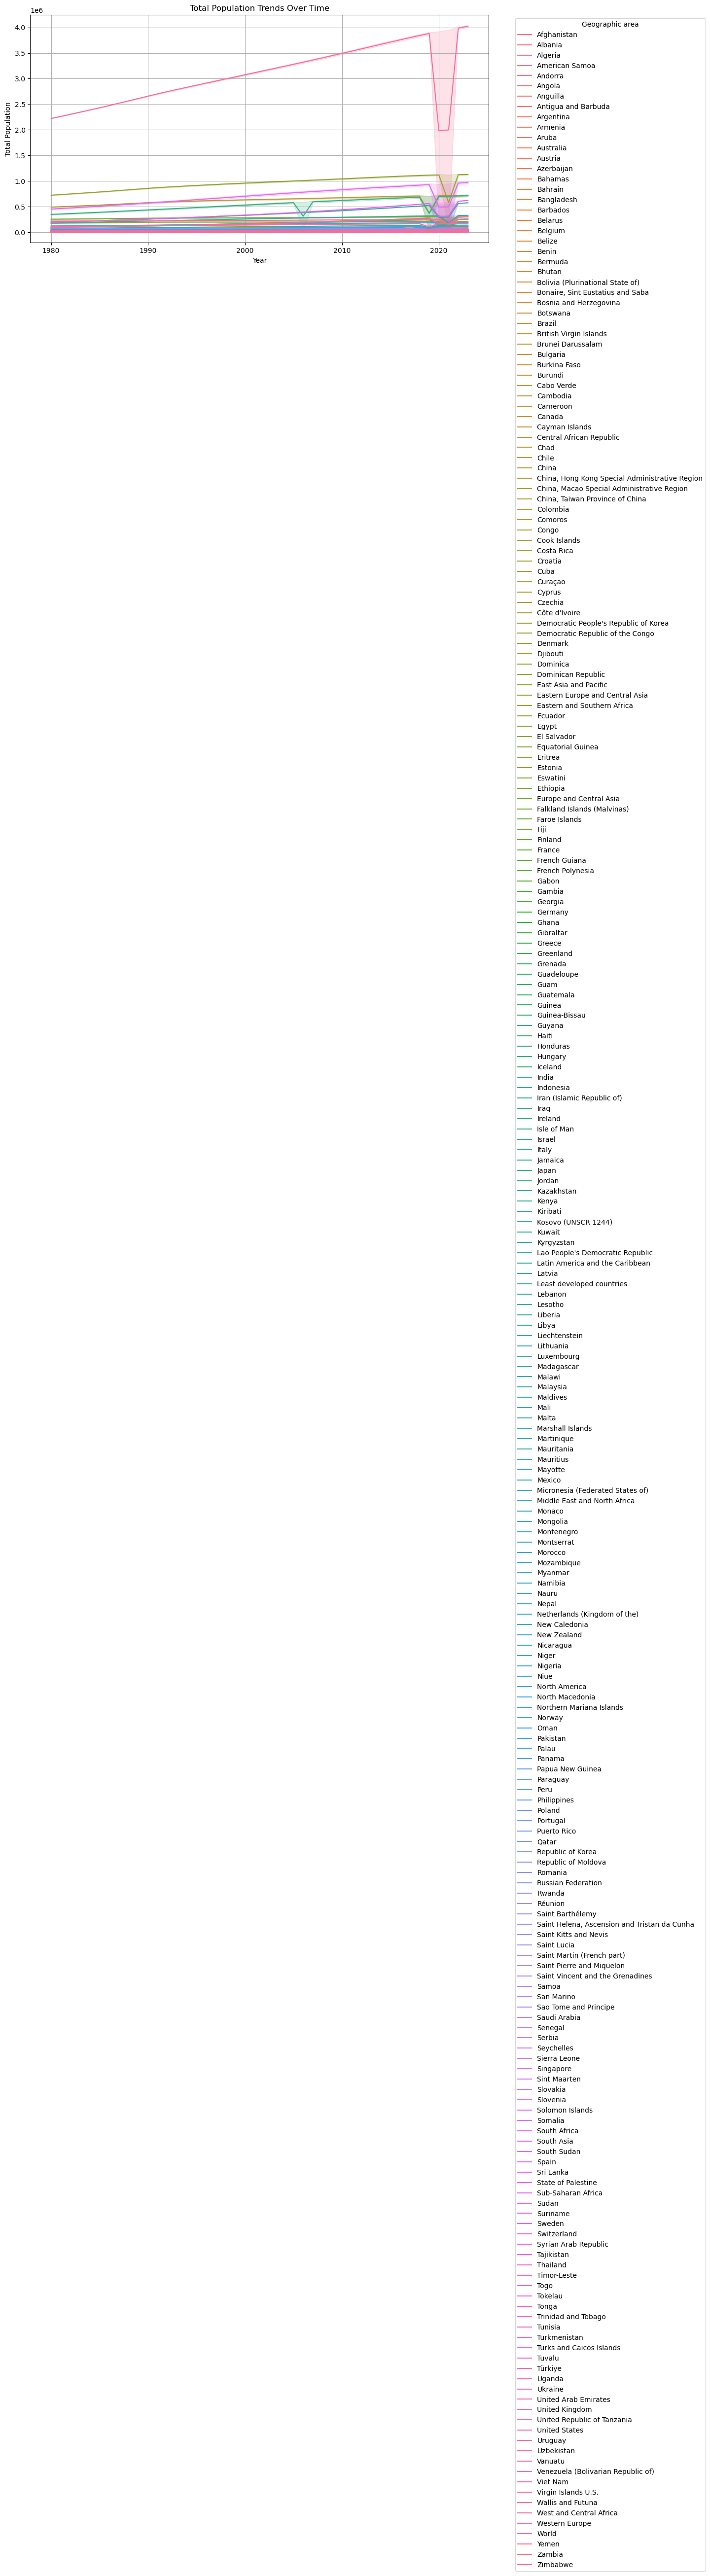

In [12]:
# Trends over time for Total population
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_df, x='Year', y='Total population', hue='Geographic area')
plt.title('Total Population Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(title='Geographic area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Geographic area
World                              2.761711e+08
East Asia and Pacific              8.437180e+07
South Asia                         6.337190e+07
China                              5.532620e+07
India                              4.767222e+07
Sub-Saharan Africa                 3.282750e+07
Least developed countries          3.172960e+07
Europe and Central Asia            2.498226e+07
Latin America and the Caribbean    2.300074e+07
Western Europe                     2.068888e+07
Name: Total population, dtype: float64


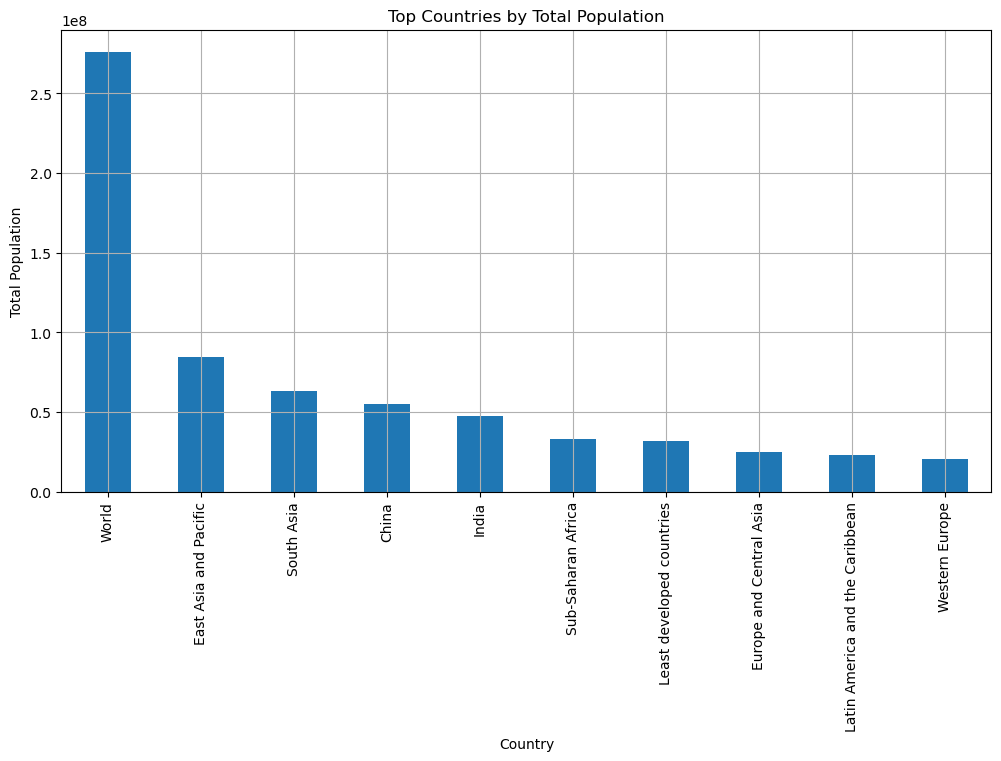

In [13]:
# Top source countries by total population
top_sources = pivot_df.groupby('Geographic area')['Total population'].sum().sort_values(ascending=False).head(10)
print(top_sources)

top_sources.plot(kind='bar', figsize=(12, 6))
plt.title('Top Countries by Total Population')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()

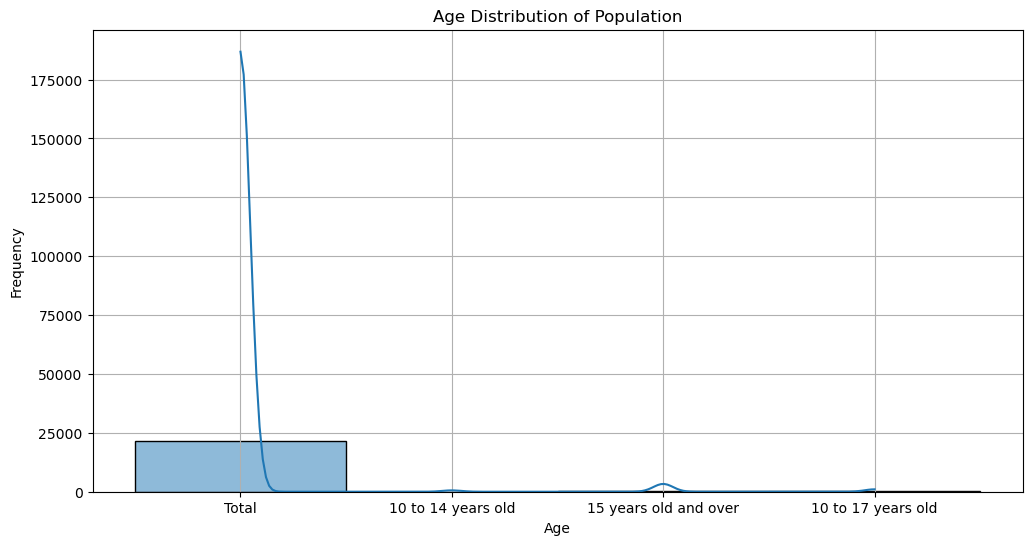

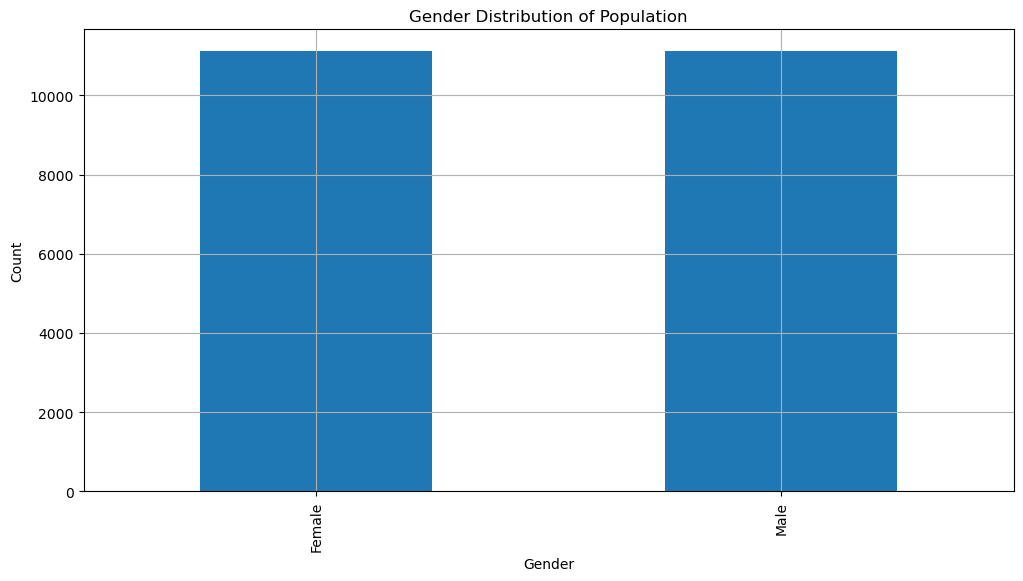

In [14]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(pivot_df['Current age'], kde=True, bins=30)
plt.title('Age Distribution of Population')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Gender distribution
gender_distribution = pivot_df['Sex'].value_counts()
gender_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Gender Distribution of Population')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()
